In [8]:
import pandas as pd
pd.options.display.float_format = '{:.5f}'.format
import numpy as np
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)
import warnings
warnings.filterwarnings("ignore")

In [9]:
import os.path
def path_base(base_name):
    current_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
    print(current_dir)
    data_dir = current_dir.replace('notebook','data')
    print(data_dir)
    data_base = data_dir + '\\' + base_name
    print(data_base)
    return data_base

In [10]:
base = pd.read_csv(path_base('db_plano_saude2.csv'))

C:\MyPhyton\DataScience\notebook
C:\MyPhyton\DataScience\data
C:\MyPhyton\DataScience\data\db_plano_saude2.csv


In [11]:
base.head(3)

,idade,custo
0,18,470
1,23,520
2,28,630


In [5]:
base.shape

(10, 2)

In [6]:
X = base.iloc[:,0:1].values
print(X)

[[18]
 [23]
 [28]
 [33]
 [38]
 [43]
 [48]
 [53]
 [58]
 [63]]


In [7]:
y = base.iloc[:,1:2].values
print(y)

[[  470]
 [  520]
 [  630]
 [  830]
 [ 1150]
 [ 1530]
 [ 2040]
 [ 3080]
 [ 5100]
 [10100]]


In [115]:
from sklearn.preprocessing import StandardScaler

In [116]:
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)


In [117]:

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [118]:
from sklearn.svm import SVR
#regressor = SVR(kernel='linear')
#regressor = SVR(kernel='poly',degree=8)
regressor = SVR(kernel='rbf')

In [119]:
regressor.fit(X,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Score

In [120]:
score = regressor.score(X,y)
score

0.7561578176049305

# plotar

In [121]:
import matplotlib.pyplot as plt

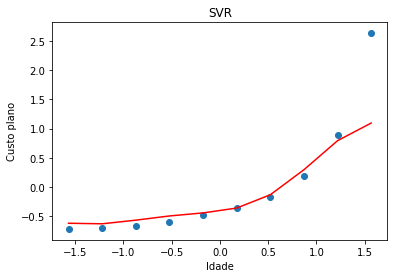

In [122]:
plt.scatter(X,y)
plt.title('SVR')
plt.xlabel('Idade')
plt.ylabel('Custo plano')
plt.plot(X,regressor.predict(X),color='red')

In [123]:
print(regressor.predict(X))

[-0.62348071 -0.63291278 -0.57066507 -0.49866508 -0.44637596 -0.36326797
 -0.13553889  0.29353246  0.79122818  1.09382968]
